# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


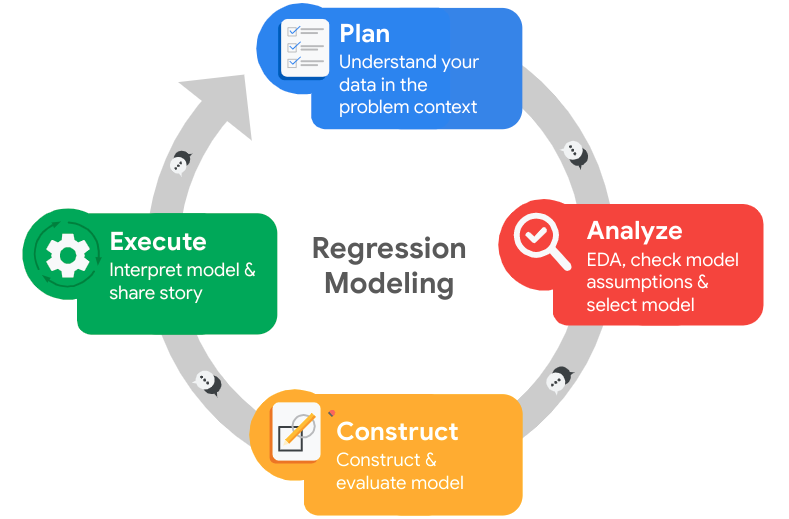

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Answers:**
- Our stakeholders for this project are Salifort Motors leadership and the folks of the HR department at Salifort Motors. Our goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.
- When we initially explore the data, we see 14999 entries with 10 columns. The dtypes of these columns are float64(2), int64(6), and object(2).

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

# Import packages for data modeling
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, \
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report


# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# Import packages for saving our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
file_name = "HR_capstone_dataset.csv"
data = pd.read_csv(file_name)


# Display first few rows of the dataframe
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
data.describe()

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
data = data.rename(columns={'last_evaluation': 'recent_evaluation',
                            'number_project': 'project_count',
                            'average_montly_hours': 'average_monthly_hours',
                            'Work_accident': 'work_accident',
                            'time_spend_company': 'tenure',
                            'left': 'departed_company',
                            'promotion_last_5years': 'promotion_past_five_years',
                            'Department': 'department'})


# Display all column names after the update
data.columns


Index(['satisfaction_level', 'recent_evaluation', 'project_count',
       'average_monthly_hours', 'tenure', 'work_accident', 'departed_company',
       'promotion_past_five_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
data.isnull().sum()


satisfaction_level           0
recent_evaluation            0
project_count                0
average_monthly_hours        0
tenure                       0
work_accident                0
departed_company             0
promotion_past_five_years    0
department                   0
salary                       0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
data.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
# Identify duplicate rows
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
duplicate_rows.head()


,satisfaction_level,recent_evaluation,project_count,average_monthly_hours,tenure,work_accident,departed_company,promotion_past_five_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
# Drop rows of duplicates after their first occurrence

modified_data = data.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
modified_data.head()


,satisfaction_level,recent_evaluation,project_count,average_monthly_hours,tenure,work_accident,departed_company,promotion_past_five_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Distribution of `tenure`')

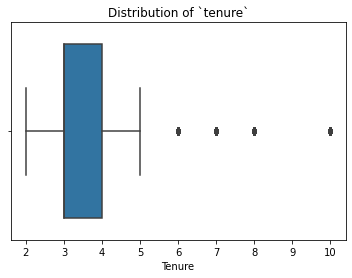

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
box = sns.boxplot(x=modified_data['tenure'])
g = plt.gca()
plt.xlabel('Tenure')
plt.title("Distribution of `tenure`")


In [12]:
def check_for_outliers(data, column_names):
    for col in column_names:
        # Calculate the IQR of the column
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        
        # Calculate the lower outlier threshold (q1 - 1.5 * IQR)
        lower_outlier_threshold = q1 - (1.5 * IQR)
        # Calculate the upper outlier threshold (q3 + 1.5 * IQR)
        upper_outlier_threshold = q3 + (1.5 * IQR)
        
        # Calculate the numer of videos with a count in that column that exceeds the outlier threshold
        outlier_count = ((data[col] < lower_outlier_threshold) | (data[col] > upper_outlier_threshold)).sum()
        # Print "Number of outliers, {column name}: {outlier count}"
        print(f"Number of outliers, {col}: {outlier_count}")

In [13]:
# Determine the number of rows containing outliers
column_names = ['tenure']

check_for_outliers(modified_data, column_names)


Number of outliers, tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Answers:**
- Some of the relationships between variables we observe are between the `satisfaction_level` (subjective), `recent_evaluation` (subjective-objective) and `average_monthly_hours.` Plus, according to the scatterplot visualizations it appears that people who left noticably increased when `average_monthly_hours` surpassed approximately 240 hours per month. They indicated as well a difference between how they felt (i.e, `satisfaction_level`) and their `recent_evaluation.`
- Approximately 83.4% of the dataset represents people who stayed and 16.6% represents people who left, so the outcome variable is imbalanced. We used resampling to create class balance in the outcome variable since we decided it was needed.  

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Check class balance
# Get numbers of people who left vs. stayed
modified_data['departed_company'].value_counts()


0    10000
1     1991
Name: departed_company, dtype: int64

In [15]:
# Check class balance
# Get percentages of people who left vs. stayed
modified_data['departed_company'].value_counts(normalize=True)*100


0    83.39588
1    16.60412
Name: departed_company, dtype: float64

In [16]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
df_majority = modified_data[modified_data["departed_company"] == 0]
df_minority = modified_data[modified_data["departed_company"] == 1]

    
# Upsample the minority class (which is "verified")
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)    # reproducible results


# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


# Display percentage (%) of values for each class
class_percentage = df_upsampled['departed_company'].value_counts(normalize=True)*100
class_percentage

0    50.0
1    50.0
Name: departed_company, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Distribution of `satisfaction_level`')

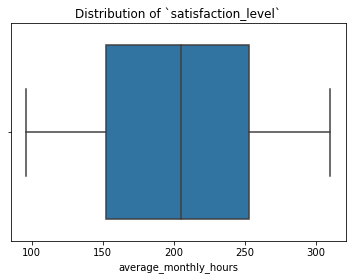

In [17]:
# Create a plot as needed
# Create a boxplot to visualize distribution of `average_monthly_hours` and detect any outliers
box = sns.boxplot(x=df_upsampled['average_monthly_hours'])
g = plt.gca()
plt.xlabel('average_monthly_hours')
plt.title("Distribution of `satisfaction_level`")


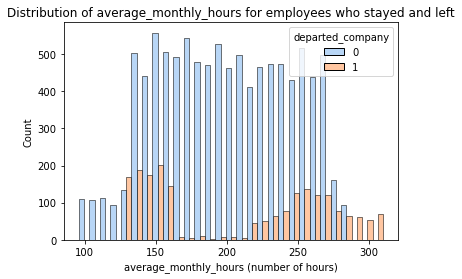

In [18]:
# Create a plot as needed
# Create two histograms in one plot

sns.histplot(data=modified_data, stat="count", multiple="dodge", x="average_monthly_hours",
             kde=False, palette="pastel", hue="departed_company",
             element="bars", legend=True)
plt.xlabel("average_monthly_hours (number of hours)")
plt.ylabel("Count")
plt.title("Distribution of average_monthly_hours for employees who stayed and left")
plt.show()

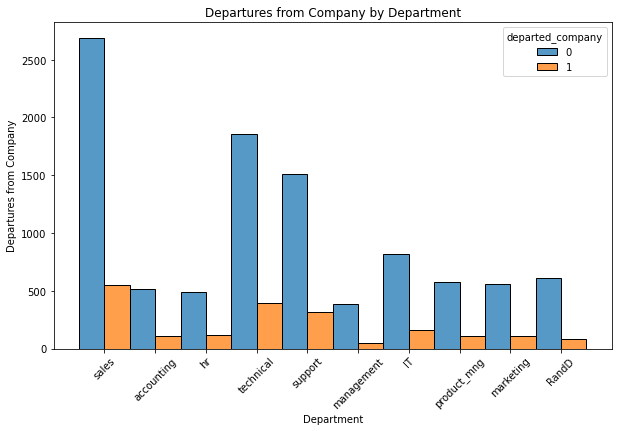

In [19]:
# Create a plot as needed
# Create a histogram

plt.figure(figsize=(10,6))

histogram = sns.histplot(modified_data, x='department', hue='departed_company', multiple='dodge', element='bars')
plt.xlabel('Department')
plt.xticks(rotation='45')
plt.ylabel('Departures from Company')
plt.title("Departures from Company by Department");
plt.show()



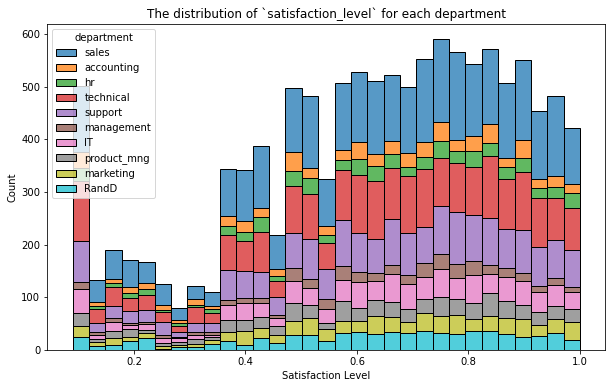

In [20]:
# Create a plot as needed
# Create two histograms in one plot
plt.figure(figsize=(10,6))

histogram = sns.histplot(data=modified_data, x='satisfaction_level', hue='department', multiple='stack')
plt.xlabel('Satisfaction Level')
plt.title("The distribution of `satisfaction_level` for each department");

plt.show()



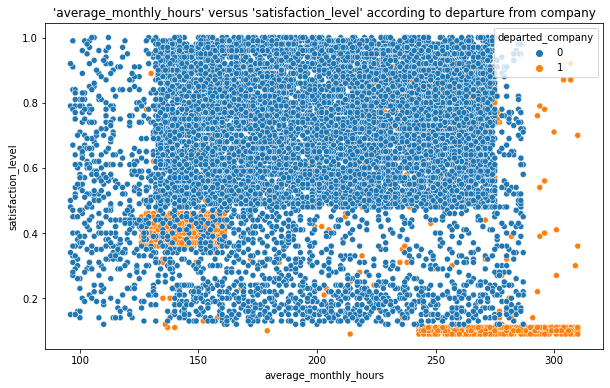

In [21]:
# Create a plot as needed
# Create a scatterplot of `average_monthly_hours` versus `satisfaction_level` according to 'departed_company'
plt.figure(figsize=(10,6))

sns.scatterplot(data=modified_data, 
            x='average_monthly_hours', 
            y='satisfaction_level', 
            hue='departed_company');
plt.xlabel('average_monthly_hours')
plt.ylabel('satisfaction_level')
plt.title("'average_monthly_hours' versus 'satisfaction_level' according to departure from company");
plt.show()



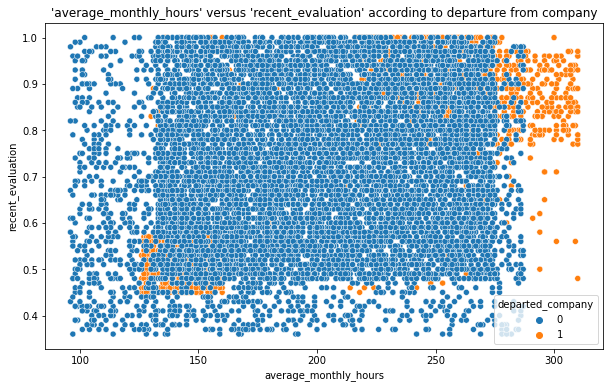

In [22]:
# Create a plot as needed
# Create a scatterplot of `average_monthly_hours` versus `recent_evaluation` according to 'departed_company'
plt.figure(figsize=(10,6))

sns.scatterplot(data=modified_data, 
            x='average_monthly_hours', 
            y='recent_evaluation', 
            hue='departed_company');
plt.xlabel('average_monthly_hours')
plt.ylabel('recent_evaluation')
plt.title("'average_monthly_hours' versus 'recent_evaluation' according to departure from company");
plt.show()



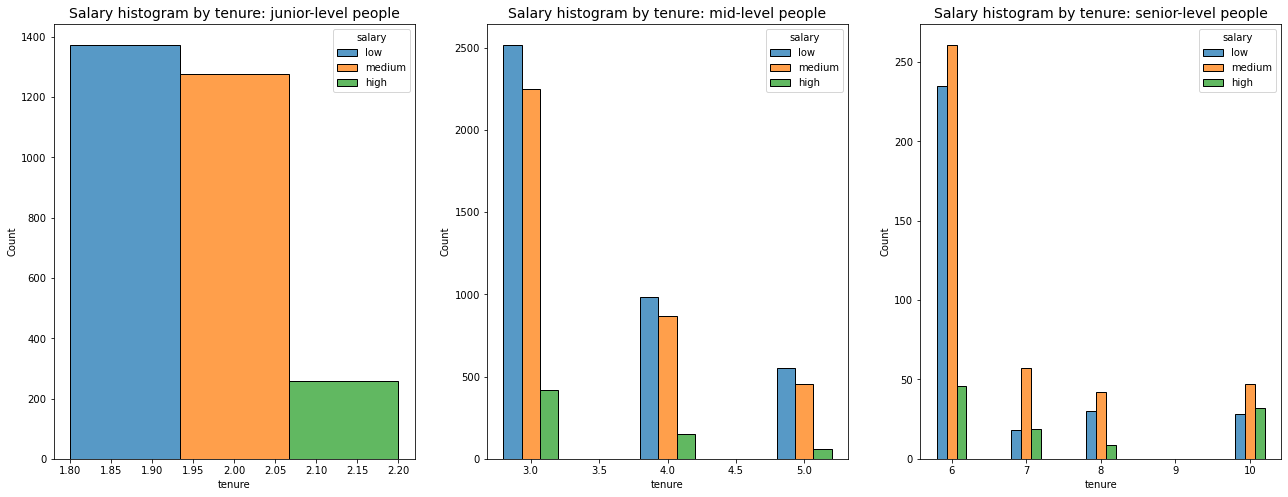

In [23]:
# Create a plot as needed
# Create three histograms in one plot

# Set figure and axes
fig, ax = plt.subplots(1, 3, figsize = (22,8))

# Define junior-tenured employees
mask = (modified_data['tenure'] <= 2)
tenure_junior = modified_data[mask]

# Define mid-tenured employees
mask = (modified_data['tenure'] > 2) & (modified_data['tenure'] <= 5) 
tenure_mid = modified_data[mask]


# Define senior-tenured employees
mask = modified_data['tenure'] > 5
tenure_senior = modified_data[mask]

salary_order = ['low', 'medium', 'high']

# Plot junior-tenured histogram
sns.histplot(data=tenure_junior, x='tenure', hue='salary', discrete=1, 
             hue_order=salary_order, multiple='dodge', shrink=.4, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: junior-level people', fontsize='14')

# Plot mid-tenured histogram
sns.histplot(data=tenure_mid, x='tenure', hue='salary', discrete=1, 
             hue_order=salary_order, multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: mid-level people', fontsize='14');

# Plot senior-tenured histogram
sns.histplot(data=tenure_senior, x='tenure', hue='salary', discrete=1, 
             hue_order=salary_order, multiple='dodge', shrink=.4, ax=ax[2])
ax[2].set_title('Salary histogram by tenure: senior-level people', fontsize='14');

In [24]:
# Calculate the count of departures for each department.

df = modified_data.groupby(['department']).agg(
  departed_company_counts = pd.NamedAgg(column='departed_company',aggfunc='count')
).reset_index()

df

,department,departed_company_counts
0,IT,976
1,RandD,694
2,accounting,621
3,hr,601
4,management,436
5,marketing,673
6,product_mng,686
7,sales,3239
8,support,1821
9,technical,2244


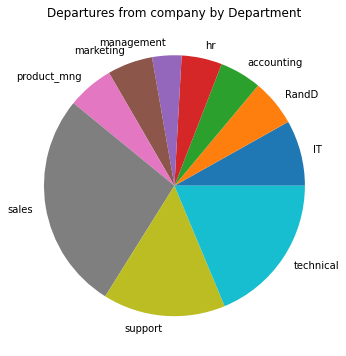

In [25]:
# Create a plot as needed
# Create a pie graph
plt.figure(figsize=(10,6))

plt.pie(data=df,
            x='departed_company_counts',
            labels='department');

plt.title("Departures from company by Department");
plt.show()

In [26]:
# Check for departed_company count of employees who worked over 160 average_monthly_hours.
mask = (modified_data['average_monthly_hours'] <= 160)

# 14999 original entries. 11991 modified entries.

df = modified_data.groupby(mask).agg(
  departed_company_counts = pd.NamedAgg(column='departed_company',aggfunc='count')
).reset_index()

df.columns = ['overworked', 'departed_company_counts']
df

,overworked,departed_company_counts
0,False,8696
1,True,3295


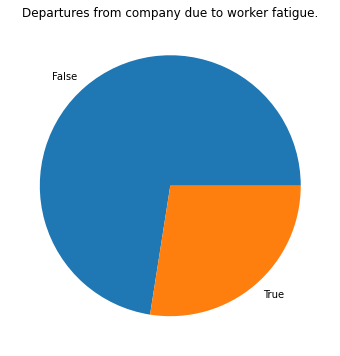

In [27]:
# Create a plot as needed
# Create a pie graph
plt.figure(figsize=(10,6))

plt.pie(data=df,
            x='departed_company_counts',
            labels='overworked');

plt.title("Departures from company due to worker fatigue.");
plt.show()


In [28]:
# Code a correlation matrix to help determine most correlated variables
correlation_matrix = df_upsampled.corr()
correlation_matrix

,satisfaction_level,recent_evaluation,project_count,average_monthly_hours,tenure,work_accident,departed_company,promotion_past_five_years
satisfaction_level,1.000000,0.122169,-0.180346,-0.068442,-0.024128,0.074384,-0.423792,0.036549
recent_evaluation,0.122169,1.000000,0.559230,0.542638,0.335608,-0.009893,0.020233,-0.017511
project_count,-0.180346,0.559230,1.000000,0.638351,0.343715,-0.016896,0.035046,-0.014039
average_monthly_hours,-0.068442,0.542638,0.638351,1.000000,0.318809,-0.026028,0.089985,-0.018590
tenure,-0.024128,0.335608,0.343715,0.318809,1.000000,-0.033353,0.253539,0.024364
work_accident,0.074384,-0.009893,-0.016896,-0.026028,-0.033353,1.000000,-0.181543,0.050078
departed_company,-0.423792,0.020233,0.035046,0.089985,0.253539,-0.181543,1.000000,-0.065323
promotion_past_five_years,0.036549,-0.017511,-0.014039,-0.018590,0.024364,0.050078,-0.065323,1.000000


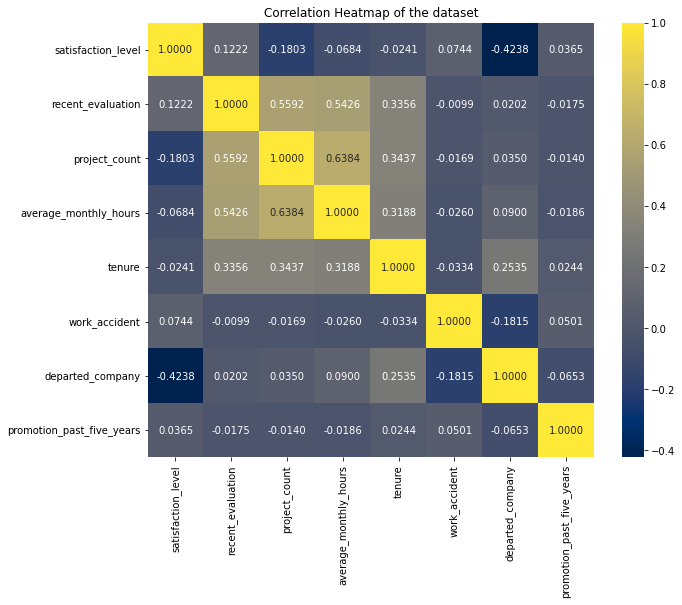

In [29]:
# Create a heatmap to visualize how correlated variables are

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, cmap="cividis", annot=True, fmt=".4f")
plt.title("Correlation Heatmap of the dataset")
plt.show()

### Insights

- First, the correlation heatmap indicates that evaluation scores, the number of projects (or project count), and average monthly hours all have some positive correlation with each other. They all have a correlation coefficient greater than .50. Plus, there appears a negative correlation between an employee's satisfaction level and their departure from the company.
- Second, it appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours and generally lower satisfaction levels. Plus, according to the pie chart visualization it appears that most of the departures from the company are from the sales, technical, and support departments.  

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**Answers:**
- Since the dtypes of `department` and `salary` are object (i.e., ategorical variables), we decided to dummy encode the `department`categorical variable and to ordinal encode the `salary`categorical variable.
- The dependent variable we chose for the model was `departed_company.` The remaining variables we selected as independent variables.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `departed_company` can be either 1 (indicating employee left and departed from the company) or 0 (indicating employee stayed). 


### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company or not) is categorical, we could either build a Logistic Regression model or a Tree-based Machine Learning model. Thus, we could proceed with one of the two following approaches; we could implement both models and see how does our logistic regression model compare to our tree-based machine learning model or we could implement two different tree-based Machine Learning models.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [30]:
# Create a copy of the X data
X = df_upsampled.copy()

# Get data types of columns
X.dtypes

satisfaction_level           float64
recent_evaluation            float64
project_count                  int64
average_monthly_hours          int64
tenure                         int64
work_accident                  int64
departed_company               int64
promotion_past_five_years      int64
department                    object
salary                        object
dtype: object

In [31]:
# Get possible values of categorical variables
department_possible_values = modified_data['department'].unique()
salary_possible_values = modified_data['salary'].unique()

print("department:".rjust(10), department_possible_values,"\n", "salary:".rjust(10) , salary_possible_values)

department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] 
    salary: ['low' 'medium' 'high']


In [32]:
# Encode categorical variables
salary_dict = {'low': 0, 'medium': 1, 'high': 2}
X['salary'] = X['salary'].map(salary_dict)

# Dummy encode remaining categorical variable
X = pd.get_dummies(X, columns=['department'], dtype=int, drop_first=True)


X.head()

,satisfaction_level,recent_evaluation,project_count,average_monthly_hours,tenure,work_accident,departed_company,promotion_past_five_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
2000,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2001,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2002,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2003,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2004,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# Isolate target variable
y = X["departed_company"]


In [34]:
# Isolate features
X = X.drop("departed_company", axis=1)
# Display first few rows of features dataframe
X.head()

,satisfaction_level,recent_evaluation,project_count,average_monthly_hours,tenure,work_accident,promotion_past_five_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
2000,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,1,0,0
2001,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0
2002,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,1,0,0
2003,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,1,0,0
2004,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
# Split the training data into training and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [37]:
# Get shape of each training, validation, and testing set
print(f"training set:", f"X_train{X_train.shape}. y_train{y_train.shape}.", f"X_tr{X_tr.shape}. y_tr{y_tr.shape}.")
print(f"validation set:", f"X_val{X_val.shape}. y_val{y_val.shape}.")
print(f"testing set:", f"X_test{X_test.shape}. y_test{y_test.shape}.")

training set: X_train(16000, 17). y_train(16000,). X_tr(12000, 17). y_tr(12000,).
validation set: X_val(4000, 17). y_val(4000,).
testing set: X_test(4000, 17). y_test(4000,).


### **Build a random forest model**

In [39]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

cv_params = {'n_estimators' : [50,100],
             'max_depth' : [2*n for n in range(1, 20)],        
             'max_features' : ['sqrt'],
             'max_samples' : [.7,.8,.9],
             'min_samples_leaf' : [1,2,4], 
             'min_samples_split' : [2, 3, 4, 5]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'roc_auc'
                     )

In [40]:
%%time
# Fit the model.
rf_cv.fit(X_tr, y_tr)
rf_cv

CPU times: user 52min 2s, sys: 6.71 s, total: 52min 9s
Wall time: 52min 14s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 

In [41]:
# Use `pickle` to save the trained model.

# Pickle the model
pickle.dump(rf_cv, open('salifort_rf_cv_v2.pickle', 'wb'))


In [42]:
current_directory = %pwd

In [ ]:
# Open pickled model
with open(current_directory+'salifort_rf_cv.pickle_v2', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [43]:
# Examine best recall score
rf_cv.best_score_

0.9982172913714793

In [44]:
def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    """
    version-01: Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    """
    
    """
    version-02: Isolate the row of the df with the max(mean precision score)
    
    """
    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_precision'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'AUC' : [roc_auc]
                         }
                        )

    return table


In [45]:
# Get all the results from the CV and put them in a df
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy', 'AUC'])
rf_cv_results = make_results("Tuned Random Forest", rf_cv)


# Concatentate rf model results table with master results table
results = pd.concat([rf_cv_results, results]).sort_values(by=['AUC'], 
                                                           ascending=False)

results

,Model,F1,Recall,Precision,Accuracy,AUC
0,Tuned Random Forest,0.993146,0.990831,0.995479,0.993167,0.998094


In [46]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 24,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

### **Build an XGBoost model**

In [47]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [50,100]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [48]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 10h 16min 9s, sys: 1min 7s, total: 10h 17min 17s
Wall time: 5h 8min 57s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [49]:
# Use `pickle` to save the trained model.

# Pickle the model
pickle.dump(xgb_cv, open('salifort_xgb_cv_v2.pickle', 'wb')) 

In [ ]:
# Open pickled model
with open(current_directory+'salifort_xgb_cv_v2.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [50]:
# Get all the results from the CV and put them in a df

# Isolate the row of the df with the max(mean precision score)

# results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy', 'AUC'])
xgb_cv_results = make_results("Tuned XGBoost", xgb_cv)
xgb_cv_results

# Concatentate xgb model results table with master results table
results = pd.concat([xgb_cv_results, results]).sort_values(by=['AUC'], 
                                                           ascending=False).reset_index(drop=True)

results

,Model,F1,Recall,Precision,Accuracy,AUC
0,Tuned XGBoost,0.989555,0.986532,0.992599,0.989562,0.998303
1,Tuned Random Forest,0.993146,0.990831,0.995479,0.993167,0.998094


### **Evaluate models**

#### **Random forest model**

In [51]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
rf_y_pred = rf_cv.best_estimator_.predict(X_val)

In [52]:
# Display the predictions on the encoded testing set

rf_y_pred


array([1, 1, 0, ..., 1, 1, 1])

In [53]:
# Display the true labels of the testing set
y_val[::5]


1922     1
11413    0
8553     0
11303    0
5264     0
        ..
429      1
6692     0
849      1
471      1
1124     1
Name: departed_company, Length: 800, dtype: int64

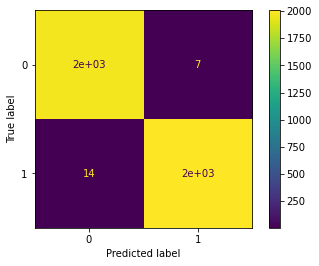

In [54]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = confusion_matrix(y_val, rf_y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

In [55]:
# Create a classification report
# Create classification report for random forest model
# Generate the classification report
target_labels = ["stayed", "left"]
report = classification_report(y_val, rf_y_pred, target_names=target_labels)
print(report)

              precision    recall  f1-score   support

      stayed       0.99      1.00      0.99      1979
        left       1.00      0.99      0.99      2021

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



#### **XGBoost model**

In [56]:
xgb_cv.best_score_

0.9983028809415015

In [57]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 100}

In [58]:
#Evaluate XGBoost model
xgb_y_pred = xgb_cv.best_estimator_.predict(X_val)

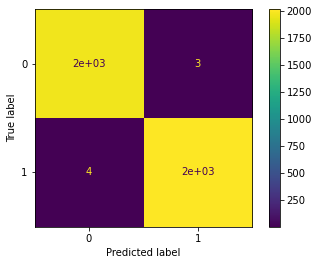

In [59]:
# Compute values for confusion matrix
cm = confusion_matrix(y_val, xgb_y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

In [60]:
# Create a classification report
target_labels = ["stayed", "left"]
report = classification_report(y_val, xgb_y_pred, target_names=target_labels)
print(report)

              precision    recall  f1-score   support

      stayed       1.00      1.00      1.00      1979
        left       1.00      1.00      1.00      2021

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



### **Use champion model to predict on test data**
Now, use the champion model to predict on the test data.

In [65]:
champion_y_pred = rf_cv.best_estimator_.predict(X_test)

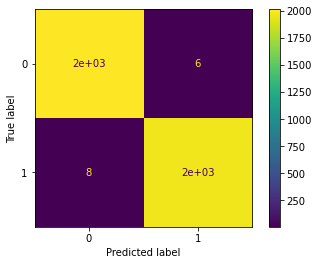

In [66]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, champion_y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

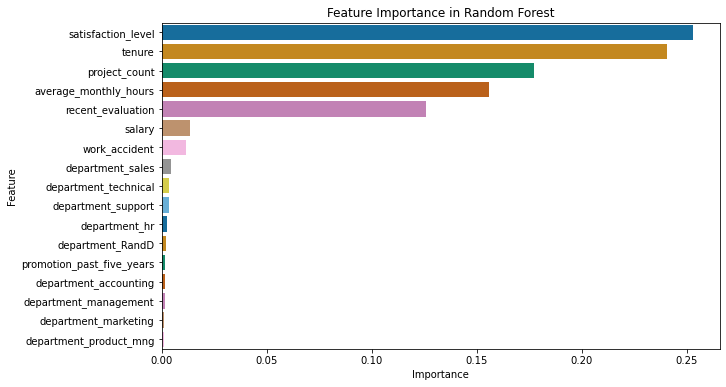

In [67]:
# Plot the relative feature importance of the predictor variables in your model.
# Extract feature importances
importances = rf_cv.best_estimator_.feature_importances_
feature_names = X_test.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='colorblind')

plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
# Get all the results from the CV
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy', 'AUC'])
rf_cv_results = make_results("Tuned Random Forest", rf_cv)
rf_cv_results

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**Answers:**
- After conducting feature engineering, the random tree model achieved an accuracy of 99.3%, a precision of 99.5%, a recall of 99.1%, an f1 of 99.3%, and an AUC of 99.8%, on the test set.
- After conducting feature engineering, the XGBoost model achieved an accuracy of 99.0%, a precision of 99.3%, a recall of 98.7%, an f1 of 99.0%, and an AUC of 99.8%, on the test set.
- It seems unnecessary to improve our model due to its high evaluation metrics; in addition, since using f1 score as the deciding metric, the random tree seems more than appropriate. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

- The models and the feature importances extracted from the models confirm that employees at the company are overworked. This seems consistant with the scatterplot visualizations showing people who left noticably increased when average_monthly_hours surpassed approximately 240 hours per month.
- To retain employees, the following recommendations could be presented to the stakeholders:
 - Cap the number of projects that employees can work on and limit the average monthly hours they work below approximately 240 hours per month.
 - Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. Plus,  conduct further investigation about why employees from the sales, technical, and support departments have lower employee retention.


### Conclusion, Recommendations, Next Steps
- The data team recommends sending this machine learning classification model to the HR department to help them make decisions to improve employee retention and predict whether or not an employee will leave the company since the model successfully classified employees that stayed as staying and employees that left as leaving.
- For another project, we could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. Plus, we may optimize our models using PyTorch.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.